In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
upladed=files.upload()

Saving california_housing_test.csv to california_housing_test.csv


In [ ]:
test=pd.read_csv("california_housing_test.csv")
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
upladed=files.upload()

Saving california_housing_train.csv to california_housing_train.csv


In [ ]:
train=pd.read_csv("california_housing_train.csv")

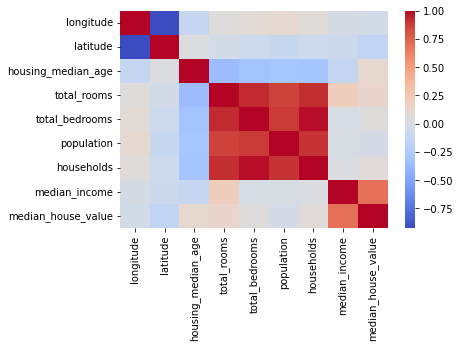

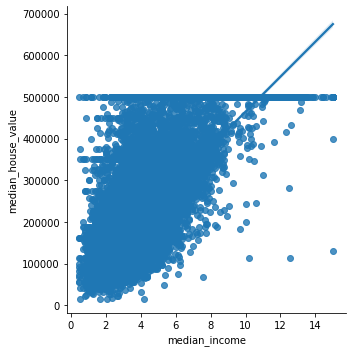

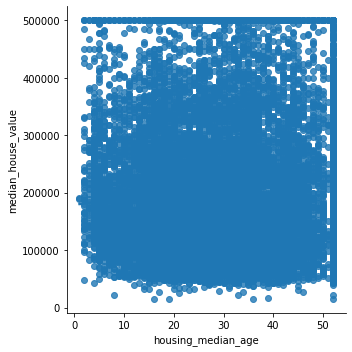

In [ ]:
plt.figure()
sns.heatmap(train.corr(),cmap='coolwarm')
plt.show()
sns.lmplot(x='median_income',y='median_house_value',data=train)
sns.lmplot(x='housing_median_age',y='median_house_value',data=train)

In [ ]:
data=train
data=data[['total_rooms','total_bedrooms','housing_median_age','median_income','population','households']]
data.info()
data['total_rooms']=data['total_rooms'].fillna(data['total_rooms'].mean())
data['total_bedrooms']=data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         17000 non-null  float64
 1   total_bedrooms      17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   median_income       17000 non-null  float64
 4   population          17000 non-null  float64
 5   households          17000 non-null  float64
dtypes: float64(6)
memory usage: 797.0 KB


<ipython-input-8-2fa8111f12dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_rooms']=data['total_rooms'].fillna(data['total_rooms'].mean())
<ipython-input-8-2fa8111f12dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_bedrooms']=data['total_bedrooms'].fillna(data['total_bedrooms'].mean())


In [ ]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
from sklearn.model_selection import train_test_split
y=train.iloc[:,8]
x_train, x_test, y_train, y_test = train_test_split(train, y,test_size=0.2,random_state=0) 

In [ ]:
print(y.name)

median_house_value


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

1.1641532182693481e-10
[ 8.20286005e-13 -9.73887637e-13 -2.14716374e-13  9.02056208e-17
 -8.11893955e-14  6.45317133e-16  7.94295185e-14 -9.10146004e-12
  1.00000000e+00]


In [ ]:
predictions=regressor.predict(x_test)
predictions=predictions.reshape(-1,1)
print(predictions)

[[171400.]
 [189600.]
 [500001.]
 ...
 [142900.]
 [128300.]
 [ 84700.]]


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))

MSE: 8.182159210202765e-22
RMSE: 2.8604473793801494e-11


In [ ]:
import numpy as np
arr=np.array([1,2,3,4,5,6,7,8,9,10,11,12])
newarr=arr.reshape(-1,1)
print(newarr)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]
